In [1]:
from astropy.io import fits
from astropy.cosmology import WMAP9 as cosmo
import math
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import plotly
from plotly.offline import plot, iplot, init_notebook_mode
import numpy as np

# 3.6 micrômetros

In [2]:
#Abre o mapa de fluxo em 3.6 mícrons
hdu_list = fits.open('ngc4501.mom0.fits')
hdu_list.info()

Filename: ngc4501.mom0.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     275   (246, 246)   int16 (rescales to float32)   


In [3]:
image_data = hdu_list[0].data
fluxmap1 = image_data
fluxmap1

array([[-2.682209e-06, -2.682209e-06, -2.682209e-06, ..., -2.682209e-06,
        -2.682209e-06, -2.682209e-06],
       [-2.682209e-06, -2.682209e-06, -2.682209e-06, ..., -2.682209e-06,
        -2.682209e-06, -2.682209e-06],
       [-2.682209e-06, -2.682209e-06, -2.682209e-06, ..., -2.682209e-06,
        -2.682209e-06, -2.682209e-06],
       ...,
       [-2.682209e-06, -2.682209e-06, -2.682209e-06, ..., -2.682209e-06,
        -2.682209e-06, -2.682209e-06],
       [-2.682209e-06, -2.682209e-06, -2.682209e-06, ..., -2.682209e-06,
        -2.682209e-06, -2.682209e-06],
       [-2.682209e-06, -2.682209e-06, -2.682209e-06, ..., -2.682209e-06,
        -2.682209e-06, -2.682209e-06]], dtype=float32)

In [4]:
# # transformando o mapa de fluxo pra jansky: MJy --> Jy: 10^6
# fluxmap3_6 = []
# for i in range(len(image_data)):
#     fluxmap3_6.append((image_data[i]))

# fluxmap3_6final = []
# for i in range(len(fluxmap3_6)):
#     fluxmap3_6final.append(fluxmap3_6[i]*((0.75/206265)**2))

In [5]:
centrox = 122.70556
centroy = 124.68909
center = (centrox,centroy)

In [6]:
# Lista de raios
raios = np.array([ 0.15829918,  1.89959019,  3.6408812 ,  5.38217221,  7.12346322,
        8.86475423, 10.60604524, 12.34733625, 14.08862726, 15.82991827,
       17.57120928, 19.31250029, 21.0537913 , 22.79508231, 24.53637332,
       26.27766432, 28.01895533, 29.76024634, 31.50153735, 33.24282836,
       34.98411937, 36.72541038, 38.46670139, 40.2079924 , 41.94928341,
       43.69057442, 45.43186543, 47.17315644])

raios[17] # último raio considerado pro plot de massa estelar

29.76024634

In [7]:
diametropixel = 1.5829918267995646
r = raios[27]/diametropixel
r

29.80000000086733

In [8]:
# r = 10 #83 é o raio da galáxia em pixels (a galáxia tem 166 pixels de diâmetro, com centro em (528,967))
a, b = centrox,centroy
#Parameter equation

theta = np.arange(0, 2*np.pi, 0.01)
x = centrox + r * np.cos(theta)
y = centroy + r * np.sin(theta)

In [9]:
fluxo3_6 = []
for u in range(246):
    for k in range(246):
        if((u-centrox)**2 + (k-centroy)**2 <= r**2):
            fluxo3_6.append(fluxmap1[k][u])
            
fluxototal3_6 = math.fsum(fluxo3_6)
print(fluxototal3_6)

320.6554115563631


# Fluxos nos raios correspondentes aos pontos observacionais de HI de VIVA

 Equação pra calcular a massa:

$$Massa\,\,(r) = 10^{5.65}\cdot Fluxo_{3.6 \mu m}^{2.85} \cdot Fluxo_{4.5 \mu m}^{-1.85}\cdot \left(\frac{Distância}{0.05}\right)^2 $$

In [10]:
massa_r = (0.236)*(fluxototal3_6)*(21.74940951004901*1000)**2
# Fluxo em Jy; Massa (r) em massas solares; Distância em Mpc
massa_r

35796908171.4874

In [11]:
Massas_HI = np.array([0,7413234.084599547,68099036.77098705,
                      275654013.97328436,738119371.2940755,
                      1538381316.428353,2726777110.223207,
                      4418867343.003464,6244173516.914616,
                      8337692397.21363,10414285009.29681,
                      12359003623.864325,14337284111.990116,
                      16340266850.440903,18427697959.814716,
                      20433546980.075485,22414642892.9914,
                      24389486925.773594,26375780014.564884,
                      28121410540.594276,29917541493.46554,
                      31320765089.455276,32464447357.12414,
                      33435729224.87249,34174775938.291126,
                      34829204948.13708,35359933205.23696,
                      35796908171.4874])

len(Massas_HI)

28

In [12]:
np.log10(35796908171.4874)

10.553845517648105

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


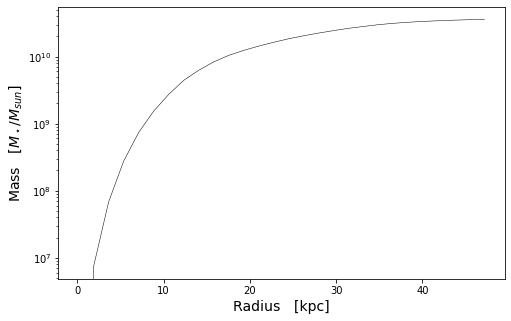

In [13]:
# Plotando as curvas

fig, ax = plt.subplots()
plt.plot(raios[0:28],Massas_HI,"-",linewidth=0.5,color="#000000")
plt.gcf().set_size_inches(8, 5)
plt.xlabel("Radius   [kpc]",fontsize = 14)
plt.yscale("log")
plt.ylabel('Mass   [$M_\star/M_{sun}$]',fontsize=14)
plt.yscale("log")
# plt.xticks([0,100])
# plt.grid(True)
plt.legend(loc="lower right",frameon=False)

plt.show()

In [14]:
mass = []

for i in range(len(Massas_HI)-1):
    mass.append(Massas_HI[i+1]-Massas_HI[i])
    
mass = np.array(mass)

mass = np.insert(mass, 0, Massas_HI[0], axis=None)

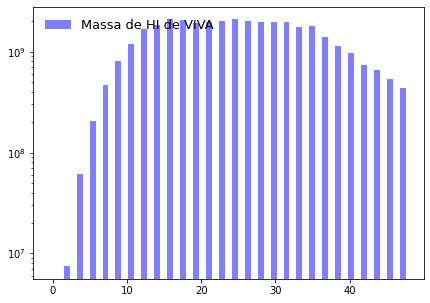

In [15]:
plt.figure(figsize=(7,5))

plt.bar(raios[0:28],mass,color="blue",alpha=0.5,label='Massa de HI de VIVA')
plt.yscale("log")
plt.legend(frameon=False,fontsize=13)              

plt.show()

In [16]:
mass

array([0.00000000e+00, 7.41323408e+06, 6.06858027e+07, 2.07554977e+08,
       4.62465357e+08, 8.00261945e+08, 1.18839579e+09, 1.69209023e+09,
       1.82530617e+09, 2.09351888e+09, 2.07659261e+09, 1.94471861e+09,
       1.97828049e+09, 2.00298274e+09, 2.08743111e+09, 2.00584902e+09,
       1.98109591e+09, 1.97484403e+09, 1.98629309e+09, 1.74563053e+09,
       1.79613095e+09, 1.40322360e+09, 1.14368227e+09, 9.71281868e+08,
       7.39046713e+08, 6.54429010e+08, 5.30728257e+08, 4.36974966e+08])